,Category,Metric,Correlation (ρ),p-value,Significant?
0,Clothing: (Dünya Genelinde),Frequency_of_Purchase,-0.172000,0.222400,❌ No
1,Clothing: (Dünya Genelinde),Customer_Satisfaction,-0.285000,0.040600,✅ Yes
2,Furniture: (Dünya Genelinde),Frequency_of_Purchase,0.009000,0.949800,❌ No
3,Furniture: (Dünya Genelinde),Customer_Satisfaction,-0.213000,0.129800,❌ No
4,Baby Products: (Dünya Genelinde),Frequency_of_Purchase,0.001000,0.992100,❌ No
5,Baby Products: (Dünya Genelinde),Customer_Satisfaction,-0.040000,0.779600,❌ No
6,Electronics: (Dünya Genelinde),Frequency_of_Purchase,-0.169000,0.231500,❌ No
7,Electronics: (Dünya Genelinde),Customer_Satisfaction,-0.200000,0.155200,❌ No
8,Books: (Dünya Genelinde),Frequency_of_Purchase,-0.172000,0.221800,❌ No
9,Books: (Dünya Genelinde),Customer_Satisfaction,-0.182000,0.195500,❌ No


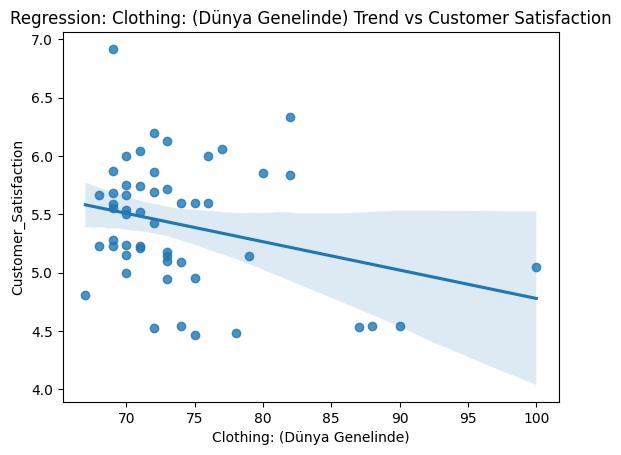

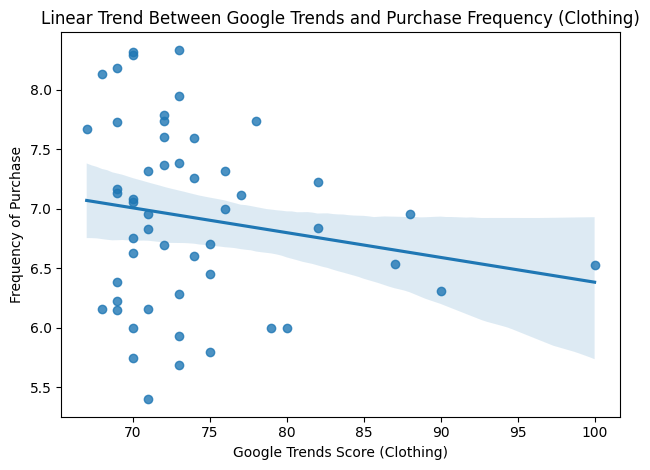

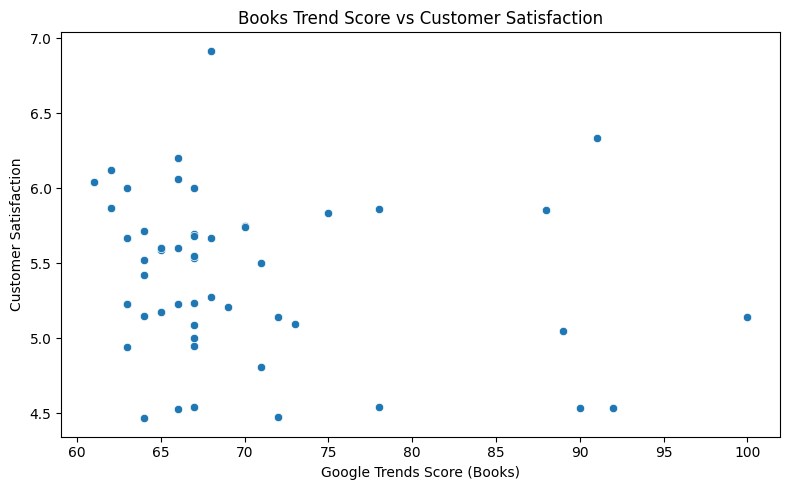

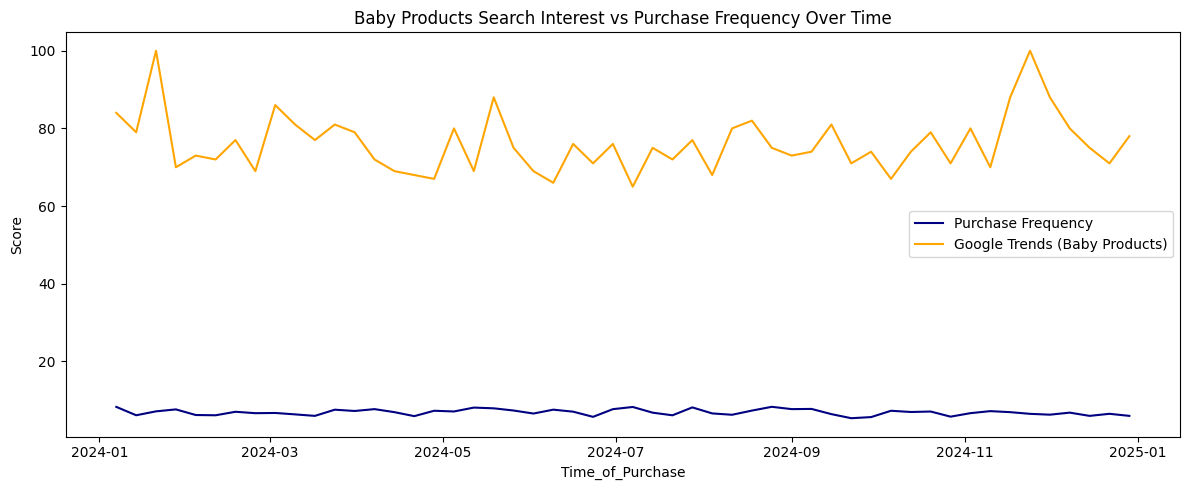

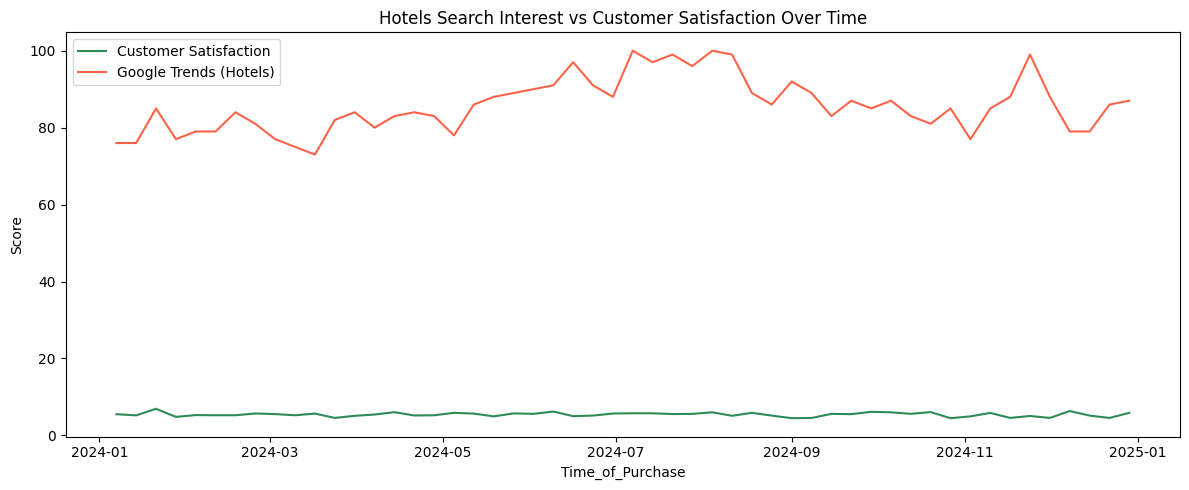

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from IPython.display import display
df_ecom = pd.read_csv("Ecommerce_Consumer_Behavior_Analysis_Data.csv")
df_ecom["Time_of_Purchase"] = pd.to_datetime(df_ecom["Time_of_Purchase"])
numeric_cols = df_ecom.select_dtypes(include="number").columns
df_weekly = df_ecom.groupby(pd.Grouper(key="Time_of_Purchase", freq="W"))[numeric_cols].mean().reset_index()
results = []

for i in range(1, 9):
    filename = f"multiTimeline-{i}.csv"

    try:
        df_trend = pd.read_csv(filename, skiprows=1)
        df_trend.rename(columns={df_trend.columns[0]: "date"}, inplace=True)
        df_trend["date"] = pd.to_datetime(df_trend["date"])

        category_name = df_trend.columns[1]

        for metric in ["Frequency_of_Purchase", "Customer_Satisfaction"]:
            df_merged = pd.merge(df_weekly, df_trend[["date", category_name]], left_on="Time_of_Purchase", right_on="date", how="inner")

            try:
                corr, p = pearsonr(df_merged[category_name], df_merged[metric])
                results.append({
                    "Category": category_name,
                    "Metric": metric,
                    "Correlation (ρ)": round(corr, 3),
                    "p-value": round(p, 4),
                    "Significant?": "✅ Yes" if p < 0.05 else "❌ No"
                })
            except:
                results.append({
                    "Category": category_name,
                    "Metric": metric,
                    "Correlation (ρ)": "NA",
                    "p-value": "NA",
                    "Significant?": "⚠️ Error"
                })

    except Exception as e:
        print(f" {filename} | Error: {e}")

df_results = pd.DataFrame(results)
display(df_results.style.background_gradient(cmap="RdYlGn", subset=["Correlation (ρ)"]))

example = pd.read_csv("multiTimeline-1.csv", skiprows=1)
example.rename(columns={example.columns[0]: "date"}, inplace=True)
example["date"] = pd.to_datetime(example["date"])
category = example.columns[1]
df_merge_example = pd.merge(df_weekly, example[["date", category]], left_on="Time_of_Purchase", right_on="date", how="inner")



sns.regplot(x=category, y="Customer_Satisfaction", data=df_merge_example)
plt.title(f"Regression: {category} Trend vs Customer Satisfaction")
plt.show()

df_clothing = pd.read_csv("multiTimeline-1.csv", skiprows=1)
df_clothing.rename(columns={df_clothing.columns[0]: "date"}, inplace=True)
df_clothing["date"] = pd.to_datetime(df_clothing["date"])

category_col = df_clothing.columns[1]

df_merged_clothing = pd.merge(df_weekly, df_clothing[["date", category_col]], left_on="Time_of_Purchase", right_on="date", how="inner")

sns.regplot(x=category_col, y="Frequency_of_Purchase", data=df_merged_clothing)
plt.title("Linear Trend Between Google Trends and Purchase Frequency (Clothing)")
plt.xlabel("Google Trends Score (Clothing)")
plt.ylabel("Frequency of Purchase")
plt.tight_layout()
plt.show()

df_books = pd.read_csv("multiTimeline-5.csv", skiprows=1)
df_books.rename(columns={df_books.columns[0]: "date"}, inplace=True)
df_books["date"] = pd.to_datetime(df_books["date"])

category_col = df_books.columns[1]

df_merged_books = pd.merge(df_weekly, df_books[["date", category_col]], left_on="Time_of_Purchase", right_on="date", how="inner")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=category_col, y="Customer_Satisfaction", data=df_merged_books)
plt.title("Books Trend Score vs Customer Satisfaction")
plt.xlabel("Google Trends Score (Books)")
plt.ylabel("Customer Satisfaction")
plt.tight_layout()
plt.show()

df_baby = pd.read_csv("multiTimeline-3.csv", skiprows=1)
df_baby.rename(columns={df_baby.columns[0]: "date"}, inplace=True)
df_baby["date"] = pd.to_datetime(df_baby["date"])

category_col = df_baby.columns[1]


df_merged_baby = pd.merge(df_weekly, df_baby[["date", category_col]], left_on="Time_of_Purchase", right_on="date", how="inner")

plt.figure(figsize=(12, 5))
plt.plot(df_merged_baby['Time_of_Purchase'], df_merged_baby['Frequency_of_Purchase'], label='Purchase Frequency', color='navy')
plt.plot(df_merged_baby['Time_of_Purchase'], df_merged_baby[category_col], label='Google Trends (Baby Products)', color='orange')

plt.title("Baby Products Search Interest vs Purchase Frequency Over Time")
plt.xlabel("Time_of_Purchase")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

df_hotels = pd.read_csv("multiTimeline-7.csv", skiprows=1)
df_hotels.rename(columns={df_hotels.columns[0]: "date"}, inplace=True)
df_hotels["date"] = pd.to_datetime(df_hotels["date"])

category_col = df_hotels.columns[1]

df_merged_hotels = pd.merge(df_weekly, df_hotels[["date", category_col]], left_on="Time_of_Purchase", right_on="date", how="inner")

plt.figure(figsize=(12, 5))
plt.plot(df_merged_hotels['Time_of_Purchase'], df_merged_hotels['Customer_Satisfaction'], label='Customer Satisfaction', color='seagreen')
plt.plot(df_merged_hotels['Time_of_Purchase'], df_merged_hotels[category_col], label='Google Trends (Hotels)', color='tomato')

plt.title("Hotels Search Interest vs Customer Satisfaction Over Time")
plt.xlabel("Time_of_Purchase")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()





